In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")



In [3]:
df=pd.read_csv('Advertising.csv')

In [8]:
df.sample(5)

,TV,Radio,Newspaper,Sales
144,96.2,14.8,38.9,11.4
168,215.4,23.6,57.6,17.1
183,287.6,43.0,71.8,26.2
35,290.7,4.1,8.5,12.8
111,241.7,38.0,23.2,21.8


In [9]:
df = df.drop(columns='Unnamed: 0', errors='ignore')


In [7]:
df.sample(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
142,220.5,33.2,37.9,20.1
113,209.6,20.6,10.7,15.9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.shape

(200, 4)

In [12]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


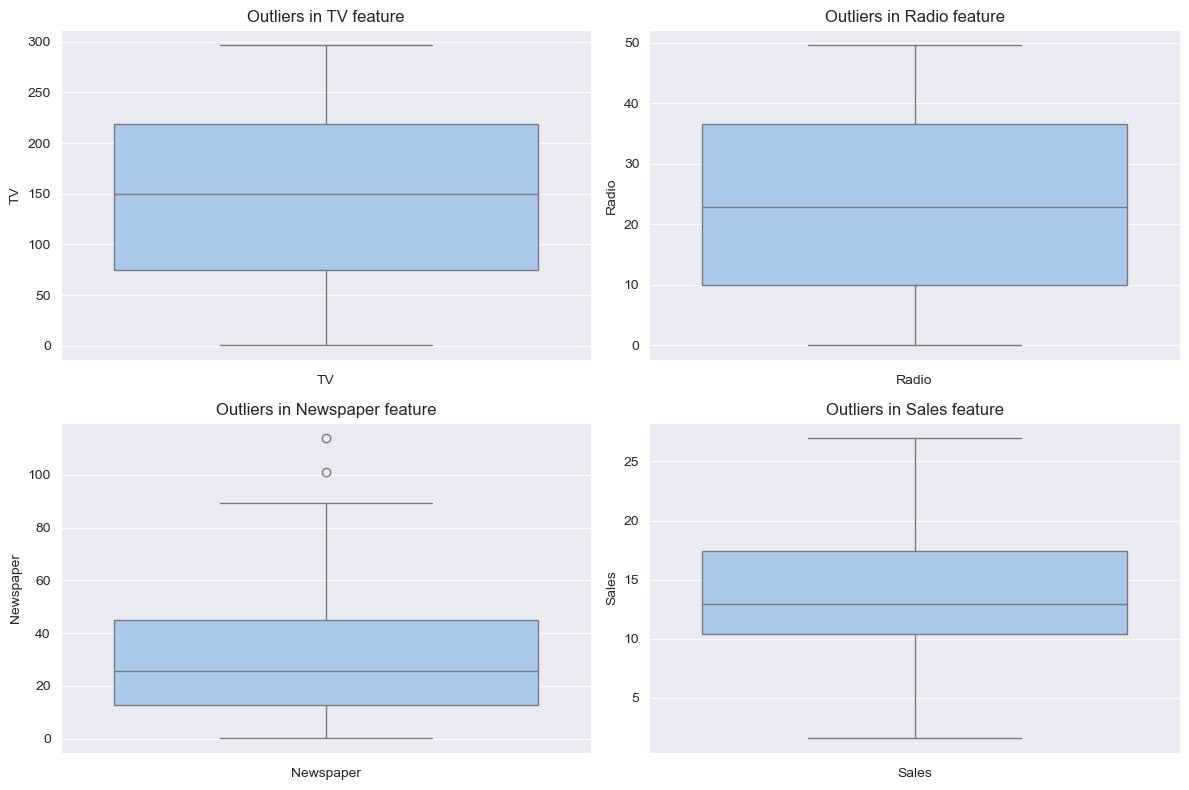

In [18]:
plt.figure(figsize=(12, 8))

columns = {0: "TV", 1: "Radio", 2: "Newspaper", 3: "Sales"}

for plot, col_name in columns.items():
    plt.subplot(2, 2, plot + 1)
    sns.boxplot(data=df[col_name], palette="pastel")
    plt.xlabel(col_name)
    plt.title("Outliers in {} feature".format(col_name))

plt.tight_layout()
plt.show()


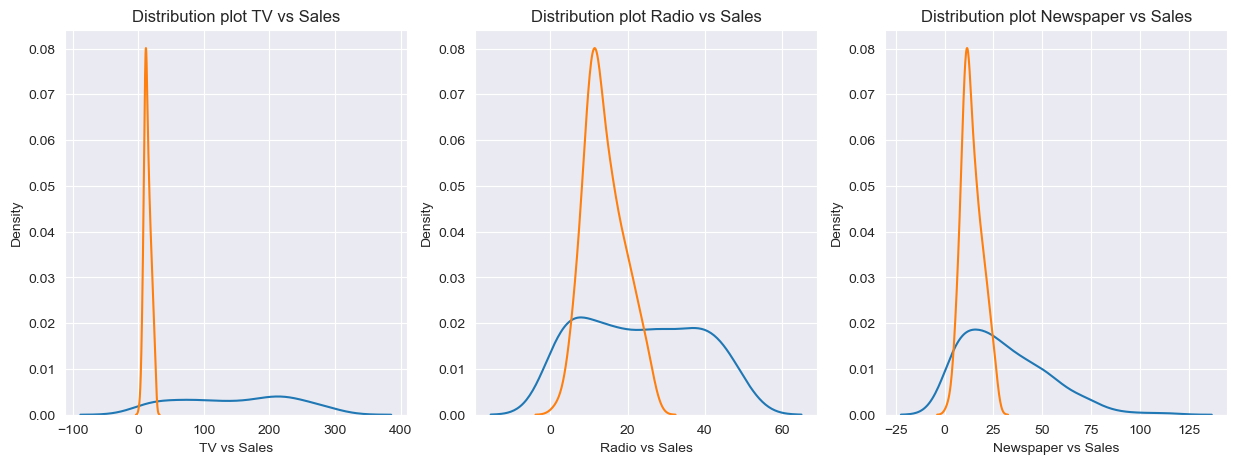

In [20]:
plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)

    sns.distplot(df[col_name], hist=False, label=col_name)
    sns.distplot(df["Sales"], hist=False, label="Sales")

    plt.xlabel("{} vs Sales".format(col_name))
    plt.title("Distribution plot {} vs Sales".format(col_name))
    


In [21]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


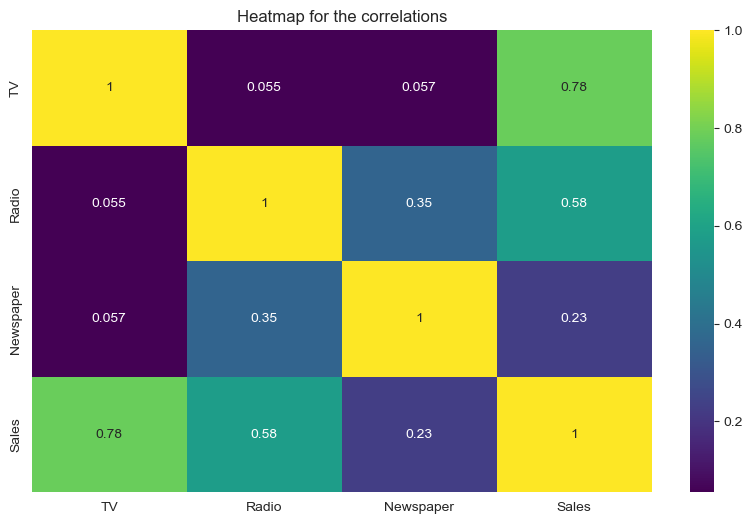

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.title("Heatmap for the correlations")
plt.show()

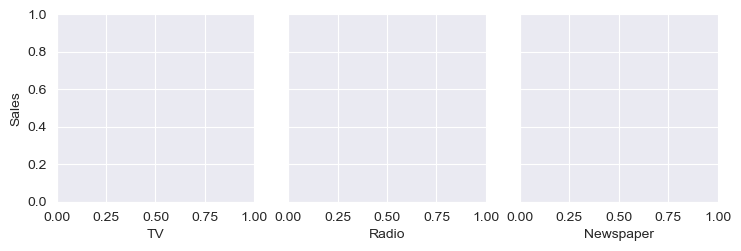

In [24]:
sns.pairplot(data=df,x_vars=["TV","Radio","Newspaper"],y_vars="Sales",kind="re",palette="pastel")
plt.show()

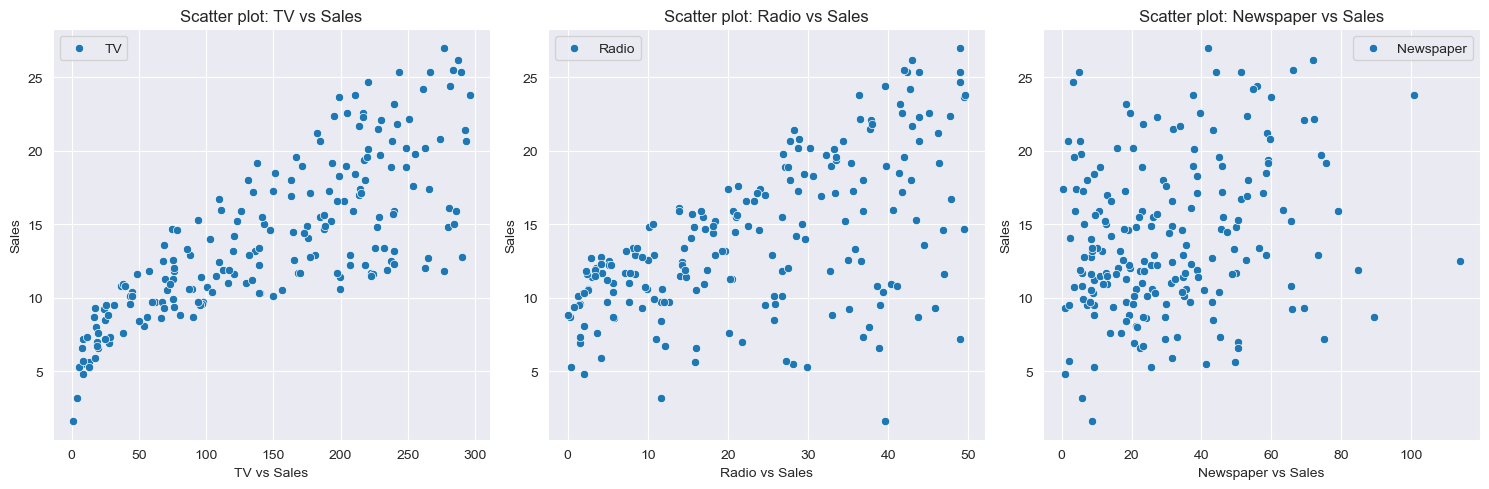

In [25]:
plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)

    sns.scatterplot(
        x=df[col_name],
        y=df["Sales"],
        label=col_name,
        palette="pastel"
    )

    plt.xlabel("{} vs Sales".format(col_name))
    plt.title("Scatter plot: {} vs Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()


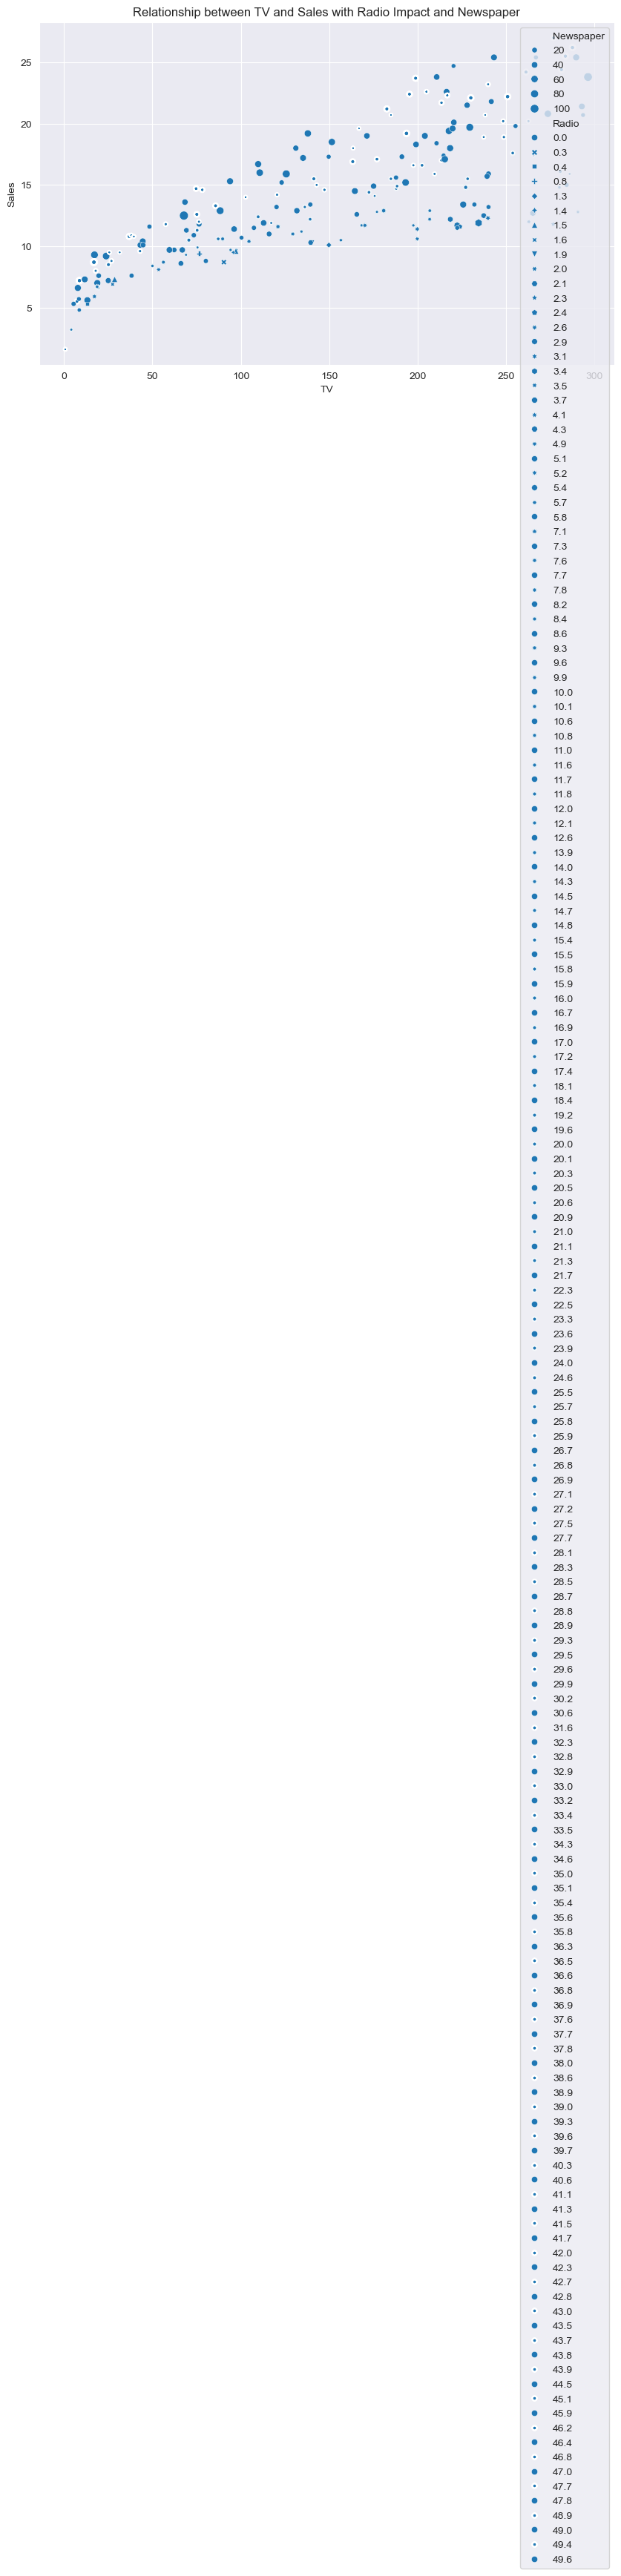

In [26]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x="TV",
    y="Sales",
    style="Radio",
    size="Newspaper",
    palette="pastel"
)

plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Relationship between TV and Sales with Radio Impact and Newspaper")

plt.show()


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

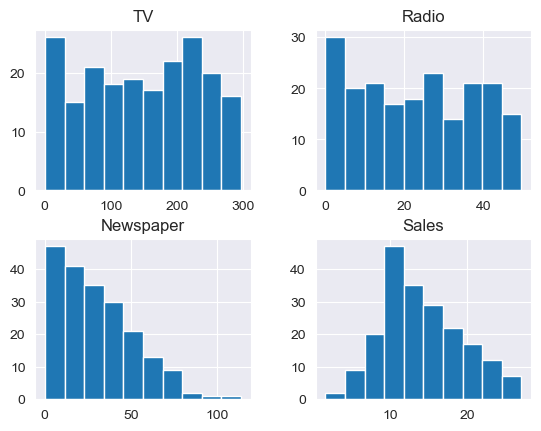

In [27]:
df.hist()

In [28]:
plt.show()

In [29]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [38]:
x=df.drop(columns="Sales",axis=1)

In [39]:
y=df["Sales"]

In [40]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
le = LabelEncoder()
y_le = le.fit_transform(y)


In [43]:
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [44]:
X = df[["TV", "Radio", "Newspaper"]]  
y = df["Sales"]                        


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
]


Linear Regression
Mean Squared Error: 3.17
R2 Score: 0.90
Cross-validation R2: 0.86


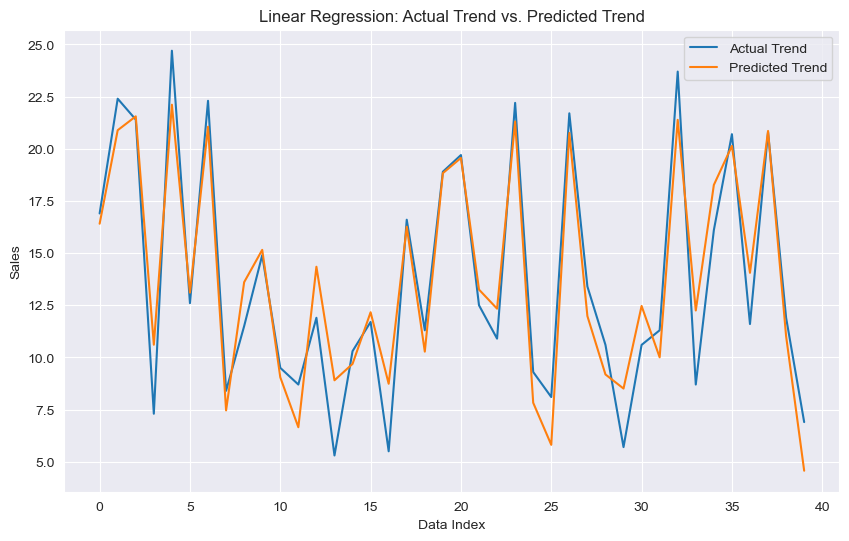


Ridge Regression
Mean Squared Error: 3.50
R2 Score: 0.89
Cross-validation R2: 0.85


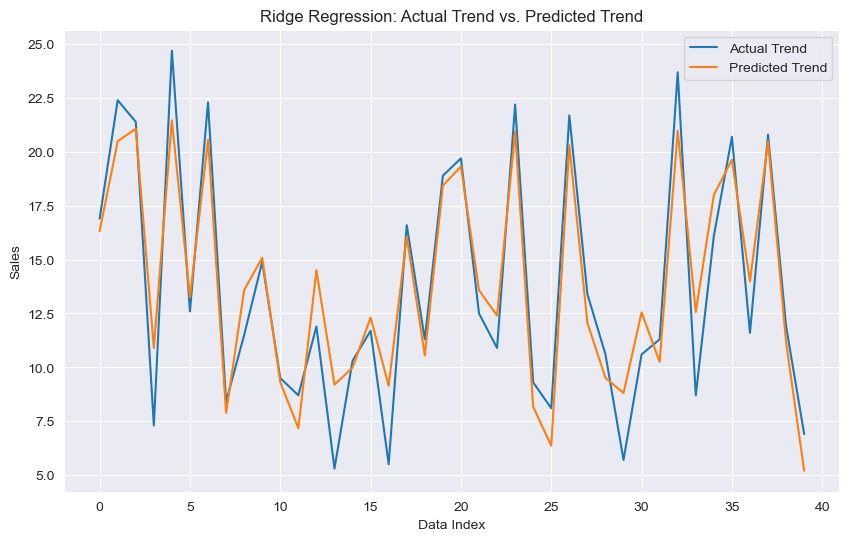


Lasso Regression
Mean Squared Error: 27.83
R2 Score: 0.12
Cross-validation R2: -0.07


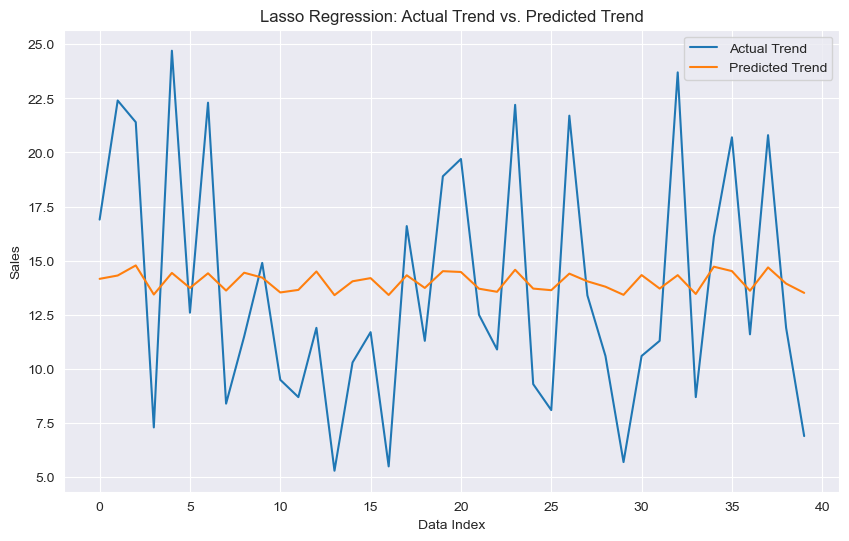

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f"{name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print(f"Cross-validation R2: {cv_scores.mean():.2f}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.title(f"{name}: Actual Trend vs. Predicted Trend")
    plt.xlabel('Data Index')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()
    
    print()


In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)  
y_pred = lr.predict(X_test_scaled)


In [52]:

tv = float(input("Enter the TV value: "))
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value: "))
new_data = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [news]
})
new_data_scaled = scaler.transform(new_data)
new_pred = lr.predict(new_data_scaled)
print("Predicted Sales: {:.2f}".format(new_pred[0]))


Enter the TV value:  76.3
Enter the Radio value:  27
Enter the Newspaper value:  16


Predicted Sales: 11.54
